In [ ]:
  from google.colab import drive

  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Define paths and constants
train_dir = os.path.expanduser("/content/drive/My Drive/capstone-3/milestone-3/aptos2019-blindness-detection/images/train")
val_dir = os.path.expanduser("/content/drive/My Drive/capstone-3/milestone-3/aptos2019-blindness-detection/images/validation")
img_size = (224, 224)
batch_size = 32
num_classes = 5

#  Create Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False  # Important for matching predictions to true labels
)


Found 1590 images belonging to 5 classes.
Found 413 images belonging to 5 classes.


In [ ]:
# Build the Model using EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_path = '/content/drive/My Drive/capstone-3/milestone-3/aptos2019-blindness-detection/dr_model.h5'
model_path1 = '/content/drive/My Drive/capstone-3/milestone-3/aptos2019-blindness-detection/dr_model.keras'
history_path = '/content/drive/My Drive/capstone-3/milestone-3/aptos2019-blindness-detection/training_history.npy'
model.save(model_path)
model.save(model_path1)
print("Model saved to Google Drive")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


✅ Model saved to Google Drive


In [ ]:
# Train the Model
import numpy as np
history = model.fit(
    train_generator,
    epochs=10,  # Increase from 10-30
    validation_data=val_generator
)


# Save history.history dictionary
np.save(history_path, history.history)
print("Training history saved")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 809s 15s/step - accuracy: 0.5077 - loss: 1.2829 - val_accuracy: 0.0387 - val_loss: 1.6742
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.8139 - loss: 0.5634 - val_accuracy: 0.0387 - val_loss: 1.7575
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.8350 - loss: 0.4821 - val_accuracy: 0.0387 - val_loss: 1.7808
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.8487 - loss: 0.4226 - val_accuracy: 0.0387 - val_loss: 1.7320
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.8690 - loss: 0.3396 - val_accuracy: 0.0484 - val_loss: 1.8229
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.8800 - loss: 0.3439 - val_accuracy: 0.3075 - val_loss: 1.5942
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.8861 - loss: 0.3128 - val_accuracy: 0.2615 - val_loss: 1.5950
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.9133 - loss: 0.2736 - val_accuracy: 0.1332 - 

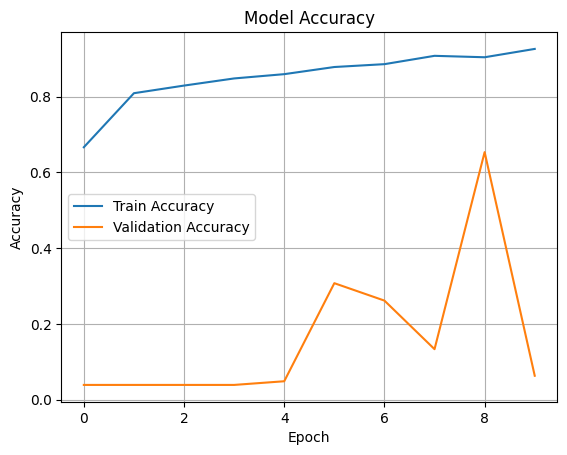

In [ ]:
# Evaluate the Model
# Plot accuracy & loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step

Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.03      0.05       256
           1       0.09      0.11      0.10        35
           2       0.00      0.00      0.00        81
           3       0.04      0.94      0.08        16
           4       0.00      0.00      0.00        25

    accuracy                           0.06       413
   macro avg       0.14      0.22      0.05       413
weighted avg       0.37      0.06      0.04       413



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


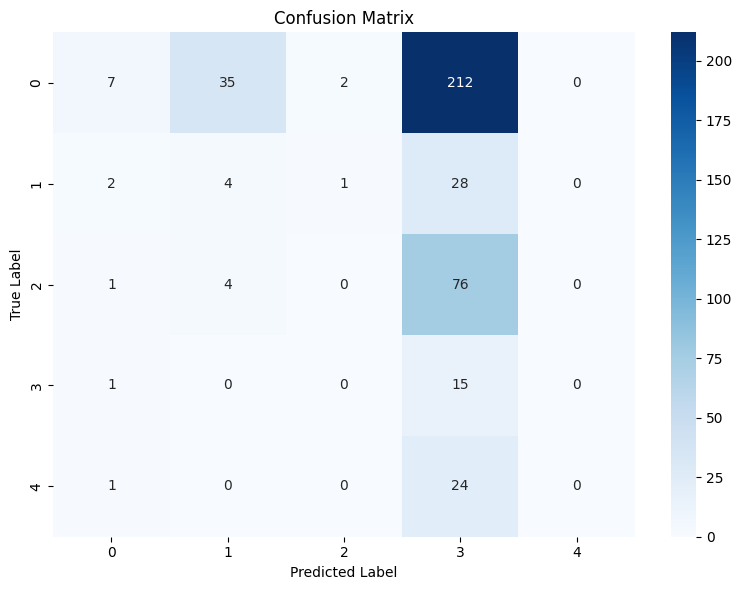

In [ ]:
# Classification Report & Confusion Matrix
y_pred_probs = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()